In [2]:
import pandas as pd
train = pd.read_csv('t2-1-train.csv')
test = pd.read_csv('t2-1-test.csv')
print(train.info(), test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1490 non-null   int64  
 1   Age                  1490 non-null   int64  
 2   Employment Type      1490 non-null   object 
 3   GraduateOrNot        1490 non-null   object 
 4   AnnualIncome         1486 non-null   float64
 5   FamilyMembers        1490 non-null   int64  
 6   ChronicDiseases      1490 non-null   int64  
 7   FrequentFlyer        1490 non-null   object 
 8   EverTravelledAbroad  1490 non-null   object 
 9   TravelInsurance      1490 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 116.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                  

In [3]:
Train_x = train.drop(['id','TravelInsurance'],axis=1)
Train_y = train['TravelInsurance']
Test = test.drop('id',axis=1)

Train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1490 non-null   int64  
 1   Employment Type      1490 non-null   object 
 2   GraduateOrNot        1490 non-null   object 
 3   AnnualIncome         1486 non-null   float64
 4   FamilyMembers        1490 non-null   int64  
 5   ChronicDiseases      1490 non-null   int64  
 6   FrequentFlyer        1490 non-null   object 
 7   EverTravelledAbroad  1490 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 93.2+ KB


In [4]:
Data = pd.concat([Train_x, Test],axis=0)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 496
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   object 
 2   GraduateOrNot        1987 non-null   object 
 3   AnnualIncome         1980 non-null   float64
 4   FamilyMembers        1987 non-null   int64  
 5   ChronicDiseases      1987 non-null   int64  
 6   FrequentFlyer        1987 non-null   object 
 7   EverTravelledAbroad  1987 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 139.7+ KB


In [5]:
Data['AnnualIncome'].fillna( Data['AnnualIncome'].median() ,inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 496
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   object 
 2   GraduateOrNot        1987 non-null   object 
 3   AnnualIncome         1987 non-null   float64
 4   FamilyMembers        1987 non-null   int64  
 5   ChronicDiseases      1987 non-null   int64  
 6   FrequentFlyer        1987 non-null   object 
 7   EverTravelledAbroad  1987 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 139.7+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

col_cat=['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

for cat in col_cat:
    Data[cat] = encoder.fit_transform(Data[cat])
    
Data.head()


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,28,2,1,1250000.0,6,1,0,0
1,31,2,1,1250000.0,7,1,0,0
2,29,2,1,1200000.0,7,0,0,0
3,33,1,1,650000.0,6,1,0,0
4,28,2,1,800000.0,6,0,0,1


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

col_al = Data.columns

fig, ax = plt.subplots(ncols=8, figsize=(15,3))

for i, cat in enumerate(col_al):
    ax[i].hist(Data[cat])

plt.show()

Using matplotlib backend: MacOSX


2023-05-29 20:25:59.815 python[19718:3811603] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-05-29 20:25:59.827 python[19718:3811603] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-05-29 20:25:59.840 python[19718:3811603] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-05-29 20:25:59.852 python[19718:3811603] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-05-29 20:25:59.865 python[19718:3811603] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-05-29 20:25:59.878 python[19718:3811603]

: 

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col_scaler = ['Age', 'AnnualIncome', 'FamilyMembers']

Data[col_scaler] = scaler.fit_transform(Data[col_scaler])


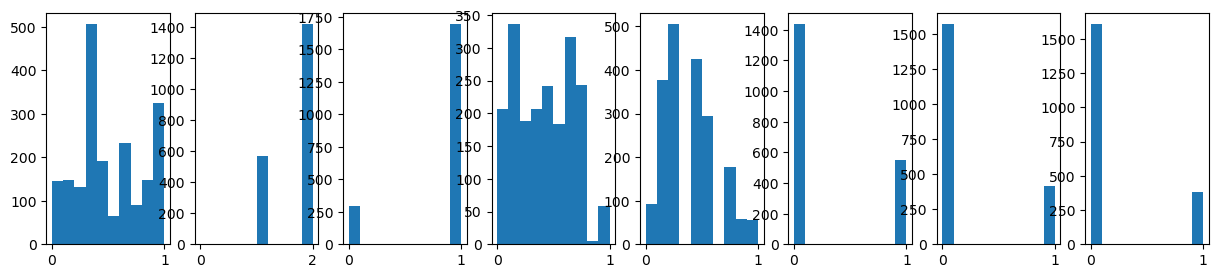

In [85]:
import matplotlib.pyplot as plt

col_al = Data.columns

fig, ax = plt.subplots(ncols=8, figsize=(15,3))

for i, cat in enumerate(col_al):
    ax[i].hist(Data[cat])

plt.show()

In [89]:
Data.iloc[1480:1500]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
1480,0.6,1,1,0.800000,0.714286,0,1,1
1481,0.4,2,1,0.500000,0.428571,1,0,0
1482,0.2,1,1,0.500000,0.285714,1,0,0
1483,0.9,2,1,0.800000,0.428571,0,1,1
1484,0.2,2,0,0.033333,0.714286,0,0,0
1485,0.3,2,1,0.333333,0.285714,0,0,0
1486,0.9,2,1,0.466667,1.000000,0,0,0
1487,0.1,2,1,0.100000,0.428571,1,0,0
1488,0.0,2,0,0.566667,0.142857,1,0,1
1489,0.6,1,1,0.066667,0.000000,0,0,0


In [90]:
train_x = Data.iloc[:1490]
test_x = Data.iloc[1490:]
train_x.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.3,2,1,0.633333,0.571429,1,0,0
1,0.6,2,1,0.633333,0.714286,1,0,0
2,0.4,2,1,0.600000,0.714286,0,0,0
3,0.8,1,1,0.233333,0.571429,1,0,0
4,0.3,2,1,0.333333,0.571429,0,0,1


In [91]:
print(test_x.info(), train_x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  497 non-null    float64
 1   Employment Type      497 non-null    int64  
 2   GraduateOrNot        497 non-null    int64  
 3   AnnualIncome         497 non-null    float64
 4   FamilyMembers        497 non-null    float64
 5   ChronicDiseases      497 non-null    int64  
 6   FrequentFlyer        497 non-null    int64  
 7   EverTravelledAbroad  497 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 34.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1489
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1490 non-null   float64
 1   Employment Type      1490 non-null   int64  
 2   GraduateOrNot        1490 non-null

In [92]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(train_x, Train_y, test_size=0.3)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [99]:
model_KNN = KNeighborsClassifier()

params_KNN = {
    'n_neighbors' : [i for i in range(3,20)],
    'leaf_size' : [i for i in range(20,200,1)]
}

grid_KNN = GridSearchCV(
    estimator=model_KNN,
    param_grid=params_KNN,
    scoring='accuracy',
    n_jobs=-1,
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    verbose=1
    )

grid_KNN.fit(x_tr, y_tr)

print('best parameter', grid_KNN.best_params_)
print('best score', grid_KNN.best_score_)

Fitting 5 folds for each of 3060 candidates, totalling 15300 fits
best parameter {'leaf_size': 53, 'n_neighbors': 6}
best score 0.7813995215311005


In [103]:
model_SVC = SVC()

params_SVC = {
    'C' : [i for i in range(1,10)],
    'degree' : [i for i in range(2,10,1)]
}

grid_SVC = GridSearchCV(
    estimator=model_SVC,
    param_grid=params_SVC,
    scoring='accuracy',
    n_jobs=-1,
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    verbose=1
    )

grid_SVC.fit(x_tr, y_tr)

print('best parameter', grid_SVC.best_params_)
print('best score', grid_SVC.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
best parameter {'C': 9, 'degree': 2}
best score 0.791912035333088


In [104]:
model_RFC = RandomForestClassifier()

params_RFC = {
    'n_estimators': [i for i in range(50, 201, 2)],
    'max_depth': [i for i in range(5, 12, 1)],
    'min_samples_split': [i for i in range(1, 3, 1)],
    'min_samples_leaf': [i for i in range(1, 2, 1)]
}

grid_RFC = GridSearchCV(
    estimator=model_RFC,
    param_grid=params_RFC,
    scoring='accuracy',
    n_jobs=-1,
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    verbose=1
    )

grid_RFC.fit(x_tr, y_tr)

print('best parameter', grid_RFC.best_params_)
print('best score', grid_RFC.best_score_)

Fitting 5 folds for each of 1064 candidates, totalling 5320 fits
best parameter {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 108}
best score 0.8369893264630107


In [110]:
model_GNB = GaussianNB()

params_GNB = {
    'n_neighbors' : [i for i in range(3,20)],
    'leaf_size' : [i for i in range(20,200,1)]
}

# grid_GNB = GridSearchCV(
#     estimator=model_GNB,
#     # param_grid=params_GNB,
#     scoring='accuracy',
#     n_jobs=-1,
#     cv=KFold(n_splits=5, shuffle=True, random_state=0),
#     verbose=1
#     )

model_GNB.fit(x_tr, y_tr)

# print('best parameter', grid_GNB.best_params_)
# print('best score', grid_GNB.best_score_)

from sklearn.metrics import roc_auc_score

pred_proba_GNB = model_GNB.predict_proba(x_val)
score_proba_GNB = roc_auc_score(y_val,pred_proba_GNB[:,1])
print(score_proba_GNB)

0.765158503857766


#Best Model Predict

In [111]:
model_RFC = RandomForestClassifier(max_depth= 9, min_samples_leaf= 1, min_samples_split= 1, n_estimators= 108)

model_RFC.fit(x_tr, y_tr)

pred_proba_RFC = model_RFC.predict_proba(x_val)
score_proba_RFC = roc_auc_score(y_val,pred_proba_RFC[:,1])
print(score_proba_RFC)

0.8158545790003355


In [115]:
test

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,32,Government Sector,Yes,650000.0,5,0,No,No
1,1,27,Government Sector,Yes,500000.0,5,0,No,No
2,2,32,Government Sector,Yes,350000.0,2,0,No,No
3,3,26,Private Sector/Self Employed,Yes,1400000.0,6,0,No,Yes
4,4,27,Private Sector/Self Employed,No,350000.0,3,0,No,No
...,...,...,...,...,...,...,...,...,...
492,492,25,Private Sector/Self Employed,No,1150000.0,5,1,Yes,No
493,493,34,Private Sector/Self Employed,Yes,1500000.0,9,0,Yes,Yes
494,494,33,Government Sector,Yes,700000.0,4,0,No,No
495,495,26,Private Sector/Self Employed,Yes,1400000.0,4,0,No,Yes


In [116]:
pred_RFC = model_RFC.predict(test_x)
display(pred_RFC)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [120]:
submission = pd.DataFrame({'id': test.id, 'TravelInsurance': pred_RFC}).to_csv('bigdata2-1-003000002.csv', index=False)